# **Práctica 6: Data classification**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset limpio
df = pd.read_csv("/content/Video_Games_Sales_Cleaned.csv")

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Creación de la variable de clasificación
Creamos una nueva columna llamada "Sales_level" que clasifica los juegos por sus ventas globales

In [8]:
# Clasificar las ventas globales en tres niveles
df["Sales_Level"] = pd.cut(
    df["Global_Sales"],
    bins = [-0.01, 0.2, 1, df["Global_Sales"].max()],
    labels=["Bajas", "Medias", "Altas"]
)

df["Sales_Level"].value_counts()

,count
Sales_Level,
Bajas,8929
Medias,5331
Altas,2031


# Preparar las variables para el modelos
Vamos a utilizar las ventas regionales como características predictoras

In [3]:
# entradas
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

# salida
y = df["Sales_Level"]

Dividir en conjuntos de entrenamiento y prueba, luego estandarizamos los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Crear y entrenar el modelo KNN
Creamos el modelo KNN con k=5 vecinos, lo entrenamos con los datos estandarizados y predecimos con los datos de prueba


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn.predict(X_test_scaled)


# Evaluamos nuestro modelo
Mostramos la matriz de confusión y la visualizamos para hacer una pequeña tabla

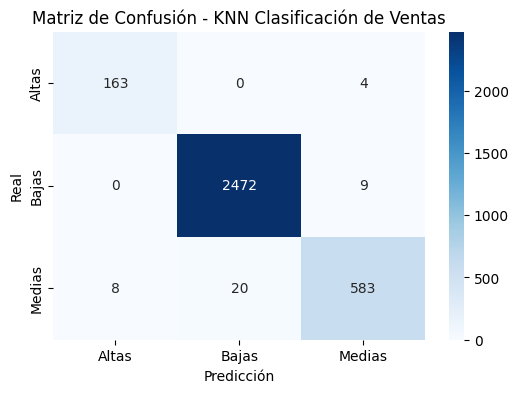


Reporte de Clasificación:

              precision    recall  f1-score   support

       Altas       0.95      0.98      0.96       167
       Bajas       0.99      1.00      0.99      2481
      Medias       0.98      0.95      0.97       611

    accuracy                           0.99      3259
   macro avg       0.97      0.98      0.97      3259
weighted avg       0.99      0.99      0.99      3259



In [5]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Clasificación de Ventas")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


Ahora probamos con diferentes valores de 'k' para encontrar la mejor

El mejor valor de k es: 11, con una precisión de 0.9893


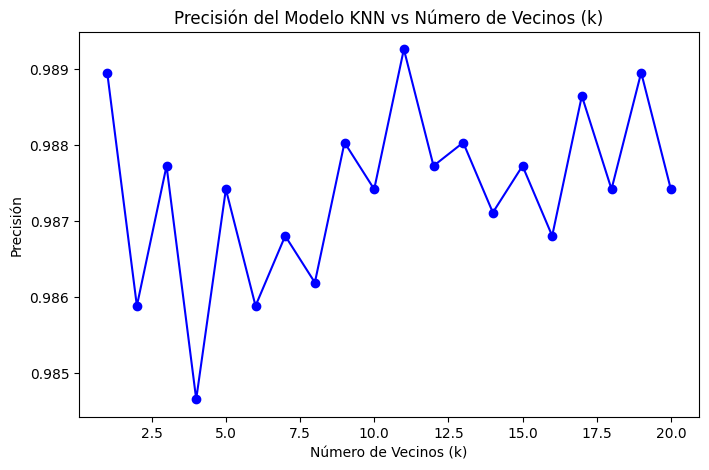

In [19]:
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred_k))

# Encontrar el mejor k
best_k = scores.index(max(scores)) + 1
print(f"El mejor valor de k es: {best_k}, con una precisión de {max(scores):.4f}")


plt.figure(figsize=(8,5))
plt.plot(k_values, scores, marker="o", color="blue")
plt.title("Precisión del Modelo KNN vs Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión")
plt.show()


# Scatter plot: Predicción vs Valor Real

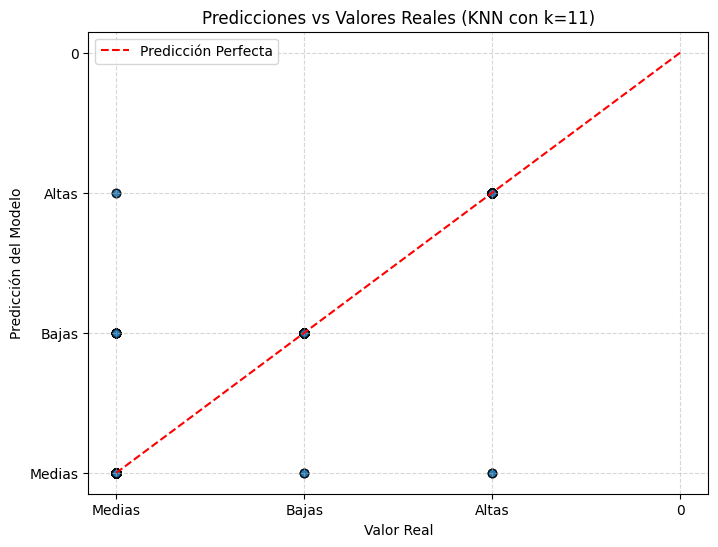

In [20]:
import matplotlib.pyplot as plt
import numpy as np

best_k = scores.index(max(scores)) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

if y_test.dtype == 'O':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_test_encoded = le.fit_transform(y_test)
    y_pred_encoded = le.transform(y_pred)
else:
    y_test_encoded = y_test
    y_pred_encoded = y_pred

# Gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(y_test_encoded, y_pred_encoded, alpha=0.6, edgecolor='black')
plt.title(f"Predicciones vs Valores Reales (KNN con k={best_k})")
plt.xlabel("Valor Real")
plt.ylabel("Predicción del Modelo")
plt.grid(True, linestyle="--", alpha=0.5)

# Línea de referencia
max_val = max(max(y_test_encoded), max(y_pred_encoded))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Predicción Perfecta')
plt.legend()
plt.show()
